<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Segmentación de países

Crear un modelo de segmentación para la clasificación de paises por categoría (desarrollado, en desarrollo, subdesarollado) según sus datos a nivel macro<br>
v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle"></div>

In [2]:
if os.access('Country-data.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv > Country-data.csv
    else:
        !wget Country-data.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv

--2024-03-25 13:09:05--  http://country-data.csv/
Resolving country-data.csv (country-data.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘country-data.csv’
--2024-03-25 13:09:05--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/Country-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9229 (9.0K) [text/plain]
Saving to: ‘Country-data.csv’

Country-data.csv    100%[===================>]   9.01K  --.-KB/s    in 0s      

2024-03-25 13:09:06 (91.5 MB/s) - ‘Country-data.csv’ saved [9229/9229]

FINISHED --2024-03-25 13:09:06--
Total wall clock time: 0.2s
Downloaded: 1 files, 9.0K in 0s (91.5 MB/s)


### `Country-data.csv`:
El dataset **`Country-data.csv`** contiene datos a nivel macroeconomía, ingresos y poblacional sobre países del mundo para su segmentación.<br>
[Dataset source](Country-data.csvn)
- **country** --> nombre del país
- **child_mort** --> cuantos niños menores a 5 años mueren de cada 1000
- **exports** --> exportación de bienes y servicios per cápita
- **health** --> inversiones en salud per cápita
- **import** --> importación de bienes y servicios per cápita
- **Income** --> ingresos por persona (neto)
- **Inflation** --> inflación anual
- **life_expec** --> Promedio de expectativa de vida
- **total_fer** --> Cuantos niños por pareja hay en promedio
- **gdpp** --> Producto bruto interno per cápita

In [3]:
df = pd.read_csv("Country-data.csv")

# Procesar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle"></div>

In [4]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes

des = df.describe()
des.loc["Nan"] = df.isna().sum()
des.loc["%Nan"] = (df.isna().mean())*100
des

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
# Alumno: ¿Cuántas filas/datos hay para analizar?

filas = df.shape[0]
print("El datase contiene", filas, "filas de datos para analizar")

El datase contiene 167 filas de datos para analizar


# Explorar datos
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle"></div>

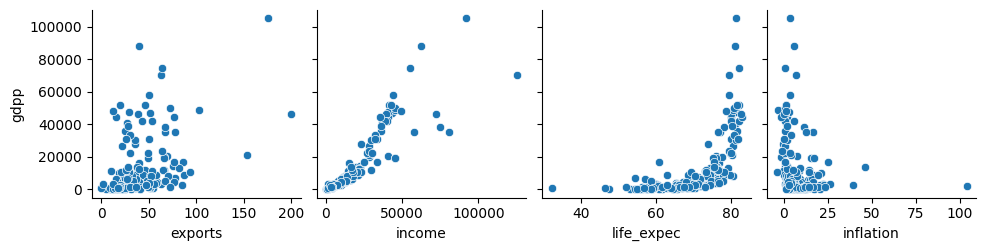

In [13]:
# Observar todas las relaciones entre el feature del producto bruto interno
# y los siguientes features
# Utilizar pairplot con y_vars=['gdpp']
# Utilizar pairplot con x_vars=['exports', 'income', 'life_expec', 'inflation']
# Recordar desactivar la diagonal(diag_kind=None,)

sns.pairplot(df, y_vars=["gdpp"], x_vars=["exports", "income", "life_expec", "inflation"], diag_kind=None)
plt.show()

Deberían observar que a medida que aumenta el producto bruto interno aumenta la exportación, el ingreso por persona (incoma), la expectativa de vida (life_expec) y baja la inflación (inflation). Este parámetro lo debe utilizar luego para determinar si los paises segmentados son:
- desarrollados
- en_desarrollo
- subdesarrollados

# Entrenar modelo
<div align="center"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle"></div>

In [19]:
# Almuno: Crear un numpy array "X" con los features de entrada expecto el nombre del pais (country)

X = df[["child_mort",	"exports",	"health",	"imports",	"income",	"inflation",	"life_expec",	"total_fer",	"gdpp"]].values
print(type(X), X)


<class 'numpy.ndarray'> [[9.02e+01 1.00e+01 7.58e+00 ... 5.62e+01 5.82e+00 5.53e+02]
 [1.66e+01 2.80e+01 6.55e+00 ... 7.63e+01 1.65e+00 4.09e+03]
 [2.73e+01 3.84e+01 4.17e+00 ... 7.65e+01 2.89e+00 4.46e+03]
 ...
 [2.33e+01 7.20e+01 6.84e+00 ... 7.31e+01 1.95e+00 1.31e+03]
 [5.63e+01 3.00e+01 5.18e+00 ... 6.75e+01 4.67e+00 1.31e+03]
 [8.31e+01 3.70e+01 5.89e+00 ... 5.20e+01 5.40e+00 1.46e+03]]


#### Crear un modelo de segmentación con Kmeans
Parámetros
- n_clusters --> (k) número de clusters/grupos (defecto 5)
- init --> método utilizado para determianr donde comienzan los clusters
 - k-means++ --> mecanismo inteligente para determinar el comienzo (defecto)
 - random --> los centros se determinarn aleatoriamente
- max_iter --> cantidad de iteración (defecto 300)

In [20]:
# Almuno: Entrenar un modelo de Kmeans en un rango de cluster (2, 10)
# Conservar el resultado de "inertial" para utilizar como métrica de selccion

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def encontrar_mejor_modelo(X, máximos_clusters=10):

    n_clusters = list(range(2, máximos_clusters+1))
    ensayos = len(n_clusters)
    print (ensayos)

    array_error = np.zeros((ensayos))
    array_score = np.zeros((ensayos))

    for i in range(ensayos):
      kmeans = KMeans(n_clusters=n_clusters[i], init="k-means++", random_state=0)
      kmeans.fit(X)
      array_error[i] = kmeans.inertia_
      array_score[i] = silhouette_score(X, kmeans.labels_)
    return array_error, array_score, n_clusters

array_error, array_score, n_clusters = encontrar_mejor_modelo(X)



9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

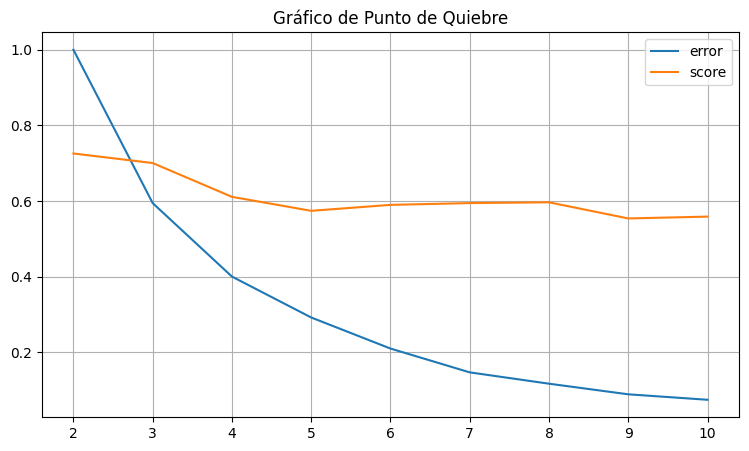

El mejor resultado se consigue con clusters= 2


In [21]:
# Dibujar la evolucion del error (inertia) y deteminar el
# punto de quiebre (elbow point)

def graficar_punto_de_quiebre(array_error, array_score, n_clusters):

  fig = plt.figure(figsize=(9, 5))
  ax = fig.add_subplot()

  ax.plot(n_clusters, array_error/array_error.max(), label='error')
  ax.plot(n_clusters, array_score, label='score')
  ax.legend()
  plt.title("Gráfico de Punto de Quiebre")
  plt.grid(True)
  plt.show()

  best_cluster = n_clusters[array_score.argmax()]
  print("El mejor resultado se consigue con clusters=", best_cluster)

graficar_punto_de_quiebre(array_error, array_score, n_clusters)

Se puede observar que el punto de elbow podría ser con cluster=4, pero ya sabemos de ante mano que queremos dividir el dataset en 3 grupos, utilizaremos n_clusters=3

In [22]:
# Alumno: Entrenar el modelo con el mejor n_clusters=3
# y determinar los labels

kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
# Alumno: Sumar la columna de labels con el nombre de countryseg (customer segmentation)
# a su dataset

df["countryseg"] = labels
df.tail(40)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,countryseg
127,Samoa,18.9,29.2,6.47,53.1,5400,1.720,71.5,4.34,3450,1
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.200,75.1,2.96,19300,2
129,Senegal,66.8,24.9,5.66,40.3,2180,1.850,64.0,5.06,1000,1
130,Serbia,7.6,32.9,10.40,47.9,12700,5.880,74.7,1.40,5410,1
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800,1
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399,1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,0
134,Slovak Republic,7.0,76.3,8.79,77.8,25200,0.485,75.5,1.43,16600,1
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400,2
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.810,61.7,4.24,1290,1


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [30]:
# Alumno: Calcular la exactitud (accuracy) del modelo

from sklearn.metrics import silhouette_score
silhouette_score (X, kmeans.labels_)

0.7003508054481694

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

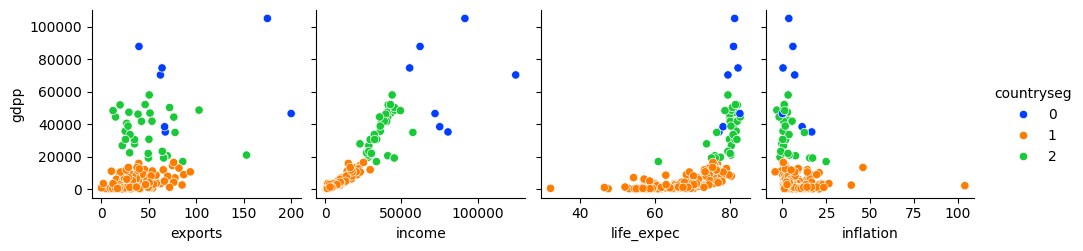

In [33]:
# Alumno: Volver a repetir el gráfico de pairplot que realizó antes
# con ['exports', 'income', 'life_expec', 'inflation']
# pero ahora utilizando para hue la columna countryseg

sns.pairplot(df, x_vars=["exports", "income", "life_expec", "inflation"], y_vars=["gdpp"], hue="countryseg", palette="bright")
plt.show()

In [36]:
# Alumno: viendo los gráficos, principalmente el de ingresos (income), deteminar
# la categoría de cada cluster y colocarla en una columna countrycat.
# Utilizar lambda expresion en función de country_seg para crear
# esa nueva coulmna
# - desarrollado
# - desarrollandose
# - subdesarrollado

df['countrycat'] = df['countryseg'].apply(lambda x: "desarrollado" if x == 2 else 'desarrollándose' if x == 1 else 'subdesarrollado')

df.tail(40)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,countryseg,countrycat
127,Samoa,18.9,29.2,6.47,53.1,5400,1.720,71.5,4.34,3450,1,desarrollándose
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.200,75.1,2.96,19300,2,desarrollado
129,Senegal,66.8,24.9,5.66,40.3,2180,1.850,64.0,5.06,1000,1,desarrollándose
130,Serbia,7.6,32.9,10.40,47.9,12700,5.880,74.7,1.40,5410,1,desarrollándose
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800,1,desarrollándose
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399,1,desarrollándose
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,0,subdesarrollado
134,Slovak Republic,7.0,76.3,8.79,77.8,25200,0.485,75.5,1.43,16600,1,desarrollándose
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400,2,desarrollado
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.810,61.7,4.24,1290,1,desarrollándose


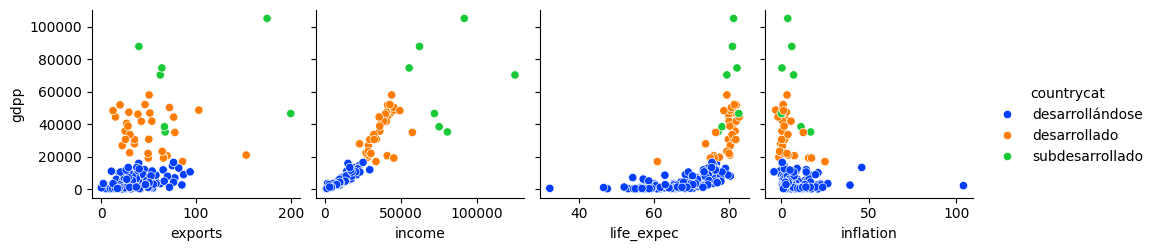

In [41]:
# Alumno: volver a graficar el gráfico anterior pero ahora usando en
# en hue = 'countrycat'

sns.pairplot(data=df, x_vars=["exports", "income", "life_expec", "inflation"], y_vars=["gdpp"], hue="countrycat", palette="bright")
plt.show()

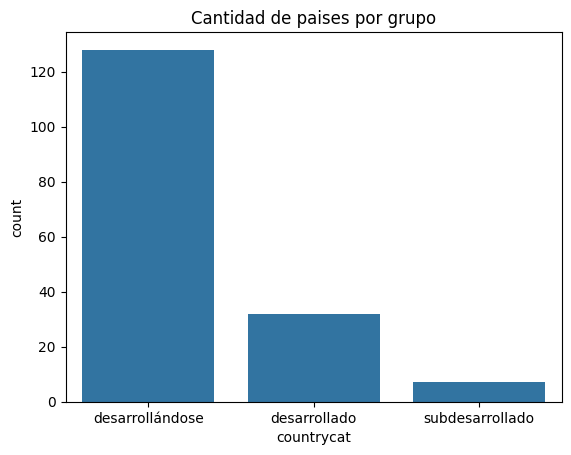

desarrollándose    128
desarrollado        32
subdesarrollado      7
Name: countrycat, dtype: int64

In [50]:
# Alumno: Determinar cuantas países hay en cada categoría
# utilizando el gráfico de seaborn countplot en la columna countrycat

sns.countplot(df, x="countrycat")
plt.title("Cantidad de paises por grupo")
plt.show()

cantidad_paises_por_grupo = df["countrycat"].value_counts()
cantidad_paises_por_grupo


Bueno ahora a jugar! Ahora puede buscar en su dataset algún país en general y ver su categoría según el modelo que armó

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">